<a href="https://colab.research.google.com/github/hanifabd/Indonesia-Covid-19-Visualization-Using-Geopandas/blob/main/Indonesia_Covid_19_Visualization_Using_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indonesia Covid-19 Visualization Using Geopandas
- ID Covid Data until 02-11-2020 : https://drive.google.com/file/d/1JQ1YjFg37TvDjibwaFH4AXUq7hJBbOkw/view?usp=sharing

- ID Map :
https://drive.google.com/file/d/1MJUl7MzQ0iEcm7qV7Ci1C0-MDYkk5lUd/view?usp=sharing

In [ ]:
! pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
# LOAD DATASET
df_data = pd.read_csv('/content/drive/My Drive/Data Science/Self Project/Covid 19 Viz/Data_Harian_Kasus_per_Provinsi_COVID-19_Indonesia.csv')
df_data.head()

,X,Y,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
0,96.909523,4.225082,1,11,Aceh,7457,5173,270
1,99.057888,2.184779,2,12,Sumatera Utara,13277,10846,542
2,100.466805,-0.851914,3,13,Sumatera Barat,14940,10764,270
3,101.812892,0.510526,4,14,Riau,14841,11490,340
4,103.599320,-1.617750,5,15,Jambi,1230,619,23


In [4]:
# LOAD MAP SHAPE
df_geo = gpd.read_file('/content/drive/My Drive/Data Science/Self Project/Covid 19 Viz/gadm36_IDN_1.json')
df_geo.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


In [5]:
df = df_geo.merge(df_data, how='inner', left_on='NAME_1', right_on='Provinsi')
df.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,X,Y,FID,Kode_Provi,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...",96.909523,4.225082,1,11,Aceh,7457,5173,270
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...",115.131651,-8.369743,17,51,Bali,11846,10766,391
2,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",106.109197,-6.456182,16,36,Banten,9654,7578,275
3,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...",102.263120,-3.791160,7,17,Bengkulu,1087,833,52
4,IDN,Indonesia,IDN.6_1,Gorontalo,,,Propinisi,Province,75,ID.GO,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0...",123.061840,0.537070,29,75,Gorontalo,3021,2859,85


In [6]:
df = df[['Provinsi','Kasus_Posi', 'Kasus_Semb', 'Kasus_Meni', 'geometry']]

df.head()

,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni,geometry
0,Aceh,7457,5173,270,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,Bali,11846,10766,391,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,Banten,9654,7578,275,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
3,Bengkulu,1087,833,52,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."
4,Gorontalo,3021,2859,85,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0..."


In [7]:
df['recover_rate'] = round((df['Kasus_Semb']/df['Kasus_Posi']),2)
df['death_rate'] = round((df['Kasus_Meni']/df['Kasus_Posi']),2)
df.head()

,Provinsi,Kasus_Posi,Kasus_Semb,Kasus_Meni,geometry,recover_rate,death_rate
0,Aceh,7457,5173,270,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1...",0.69,0.04
1,Bali,11846,10766,391,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ...",0.91,0.03
2,Banten,9654,7578,275,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ...",0.78,0.03
3,Bengkulu,1087,833,52,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ...",0.77,0.05
4,Gorontalo,3021,2859,85,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0...",0.95,0.03


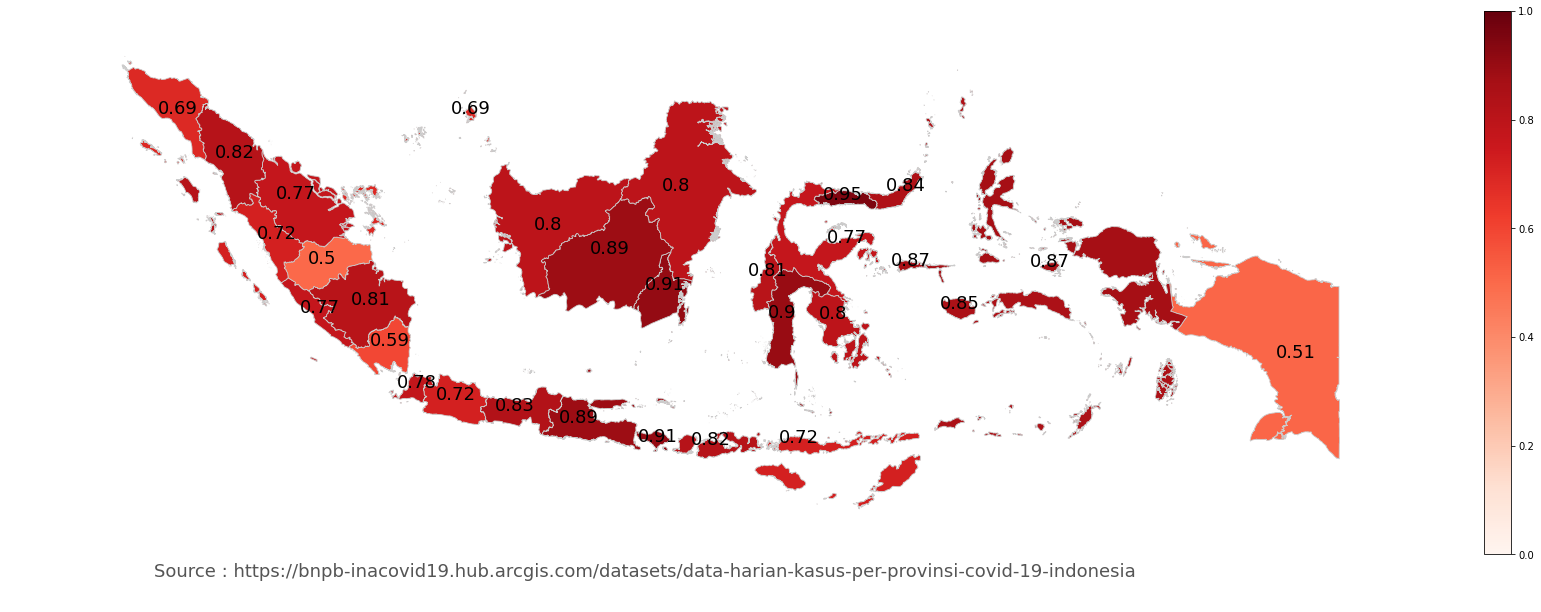

In [25]:
fig, ax = plt.subplots(figsize=(30,10))

df.plot(column='recover_rate',
        cmap='Reds', 
        linewidth=0.8, ax=ax, 
        edgecolor='0.8', 
        norm=plt.Normalize(vmin=0, 
                           vmax=1))

df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:])
df['coords'] = [coords[0] for coords in df['coords']]
for idx, row in df.iterrows():
    plt.annotate(s=row['recover_rate'], 
                 xy=row['coords'],
                 horizontalalignment='center',
                 fontsize=18,
                 color='#000000')

ax.axis('off')
ax.annotate('Source : https://bnpb-inacovid19.hub.arcgis.com/datasets/data-harian-kasus-per-provinsi-covid-19-indonesia',
            xy=(0.1,0.08),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=18,
            color='#555555')

sm = plt.cm.ScalarMappable(cmap='Reds',
                           norm=plt.Normalize(vmin=0, 
                                              vmax=1))
cbar = fig.colorbar(sm)
plt.show()